![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
#bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikeshare = pd.read_csv('../datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikeshare.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikeshare['hour'] = bikeshare.index.hour
bikes = bikeshare.copy()
# Visualización de los datos
bikeshare.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Análisis Descriptivo para las variables

             season          hour         total
count  10886.000000  10886.000000  10886.000000
mean       2.506614     11.541613    191.574132
std        1.116174      6.915838    181.144454
min        1.000000      0.000000      1.000000
25%        2.000000      6.000000     42.000000
50%        3.000000     12.000000    145.000000
75%        4.000000     18.000000    284.000000
max        4.000000     23.000000    977.000000


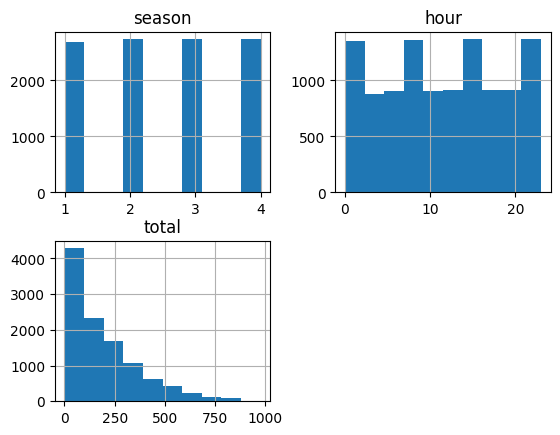

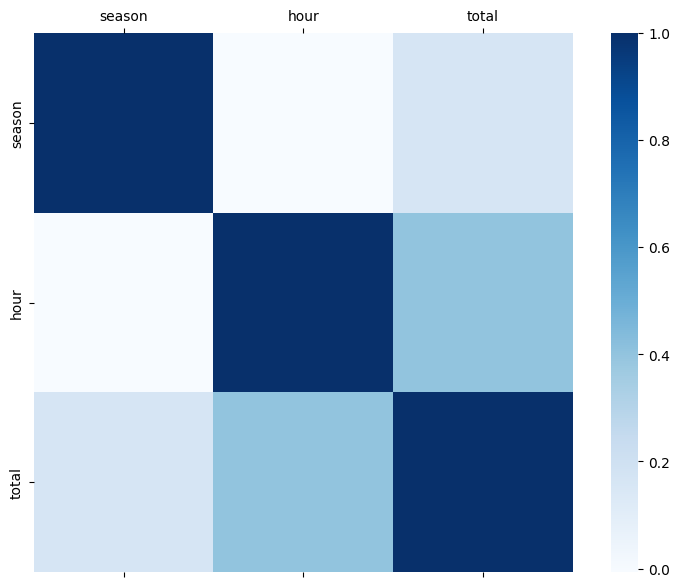

La variable season no contiene valores nulos
La variable hour no contiene valores nulos
La cuenta de registros de bicicletas rentadas por estación es: season
1    2686
2    2733
3    2733
4    2734
Name: total, dtype: int64
El promedio de bicicletas rentadas por estación es: 191.2500132627292
La temporada de mayor renta de bicicletas es: 3: 640662
La temporada que tuvo el máximo de bicicletas rentadas al mismo tiempo fue: 3: 977
La temporada que tuvo el mínimo de bicicletas rentadas al mismo tiempo fue: 1: 1

La cuenta de registros de bicicletas rentadas por estación es: hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: total, dtype: int64
El promedio de bicicletas rentadas por hora es: 190.74204496036154
La hora de mayor renta de bicicletas es: 17: 213757
La hora que tuvo el máximo de bi

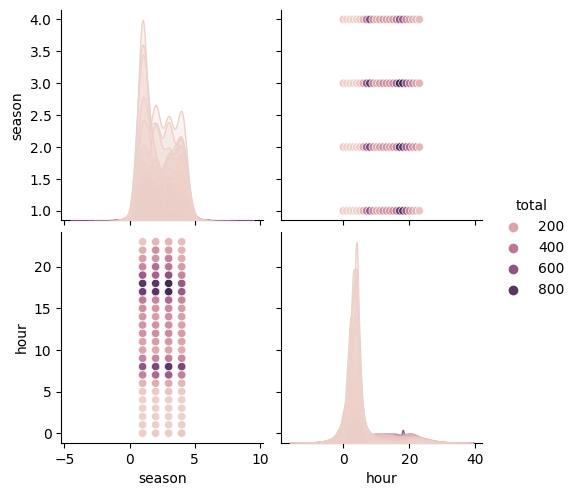

In [6]:
# Funcion para generar un correlograma
def dibujar_correlograma(df):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    color_ax = ax.matshow(df.corr(), cmap=sns.color_palette("Blues", as_cmap=True))
    sns.heatmap(df.corr(), ax=ax, cmap=sns.color_palette("Blues", as_cmap=True))
    plt.show()



print(bikes[['season','hour', 'total']].describe())
bikes[['season', 'hour', 'total']].hist()
dibujar_correlograma(bikes[['season','hour','total']])
sns.pairplot(bikes[['season','hour','total']],hue='total')

variables = ['season','hour']
# Crear diccionairo de etiquetas a cambiar
season_labels = {1:'Invierno',2:'Primavera',3:'Verano',4:'Otoño'}
for var in variables:
    if bikes[var].hasnans == True:
        print(f'La variable {var} contiene valores nulos')
    else:
        print(f'La variable {var} no contiene valores nulos')

season_group = bikes.groupby('season').total
hour_group = bikes.groupby('hour').total

#Cambiar etiquetas
bikes['season'] = bikes['season'].replace(season_labels)

#Análisis para variable season
print(f'La cuenta de registros de bicicletas rentadas por estación es: {season_group.count()}')
print(f'El promedio de bicicletas rentadas por estación es: {season_group.mean().mean()}')
print(f'La temporada de mayor renta de bicicletas es: {season_group.sum().idxmax()}: {season_group.sum().max()}')
print(f'La temporada que tuvo el máximo de bicicletas rentadas al mismo tiempo fue: {season_group.max().idxmax()}: {season_group.max().max()}')
print(f'La temporada que tuvo el mínimo de bicicletas rentadas al mismo tiempo fue: {season_group.min().idxmin()}: {season_group.min().min()}\n')

#Análisis para variable hour
print(f'La cuenta de registros de bicicletas rentadas por estación es: {hour_group.count()}')
print(f'El promedio de bicicletas rentadas por hora es: {hour_group.mean().mean()}')
print(f'La hora de mayor renta de bicicletas es: {hour_group.sum().idxmax()}: {hour_group.sum().max()}')
print(f'La hora que tuvo el máximo de bicicletas rentadas al mismo tiempo fue: {hour_group.max().idxmax()}: {hour_group.max().max()}')
print(f'La hora que tuvo el mínimo de bicicletas rentadas al mismo tiempo fue: {hour_group.min().idxmin()}: {hour_group.min().min()}\n')


A primera vista, se puede ver que el dataset está bien balanceado pues existe casi el mismo número de registros para cada agrupación tanto para la variable 'season' como para la variable 'hour'. Por otro lado, se ve cómo desde la agrupación inicial del enunciado, cada agrupación no tiene promedios muy diferentes entre ellos, sólamente para la variable 'hour' en los horarios de las 11:00 pm y las 6:00 am lo que tiene sentido que este promedio sea más bajo que las horas diurnas por lo que la mayoría de personas debería estar durmiendo en ese horario.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

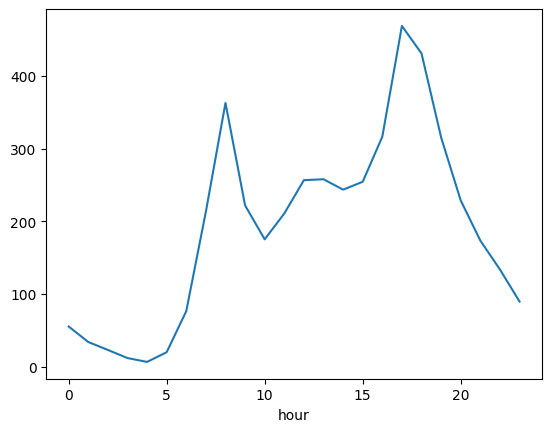

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

In [8]:
import matplotlib.pyplot as plt

def plot_seasonal_hourly_means(season):
    # Filtrar el conjunto de datos por la temporada especificada
    bikes_season = bikes[bikes['season'] == season]

    # Calcular las medias por hora para la temporada especificada
    prom_hora_season = bikes_season.groupby('hour').total.mean()

    # Crear la figura y los ejes
    fig, ax = plt.subplots()

    # Agregar la línea de la media a la figura
    ax.plot(prom_hora_season.index, prom_hora_season.values, label=season)

    # Configurar las etiquetas y leyenda de la figura
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Número promedio de bicicletas rentadas')
    ax.set_title('Número promedio de bicicletas rentadas por hora del día\npara la temporada de ' + season)
    ax.legend()

    # Mostrar la figura
    plt.show()


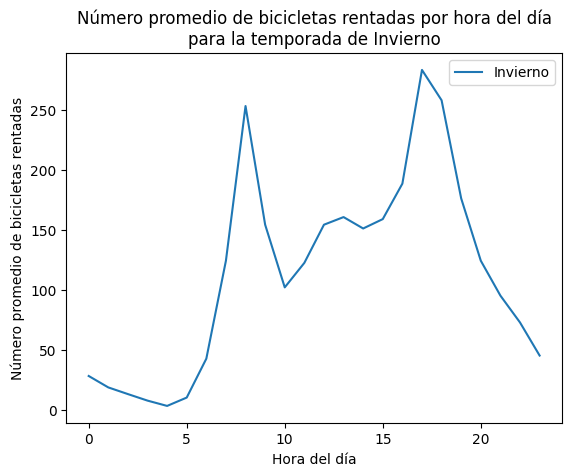

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
plot_seasonal_hourly_means('Invierno')

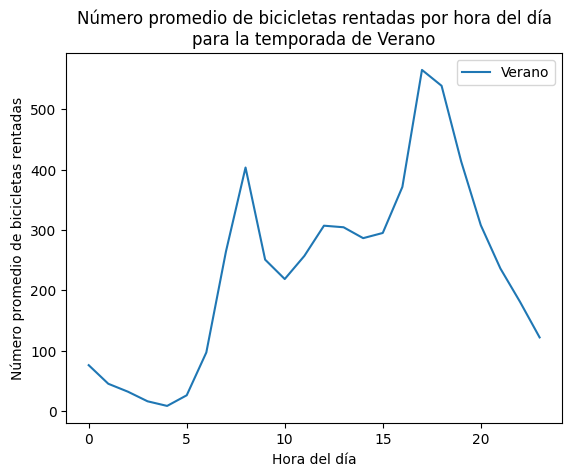

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
plot_seasonal_hourly_means('Verano')

Observando las dos gráficas al tiempo se puede ver que el promedio de bicicletas rentadas es mayor en verano que en invierno en todas la horas del días. Sin embargo, ambas gráficas reflejan un comportamiento similar en invierno y verano donde existen picos de renta en la mañana y en la tarde.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
from sklearn.linear_model import LinearRegression

# Convertir la variable categórica "season" en variables dummy
season_dummies = pd.get_dummies(bikes['season'], prefix='season', drop_first=True)

# Concatenar las variables predictoras en un nuevo conjunto de datos
X = pd.concat([season_dummies, bikes['hour']], axis=1)
y = bikes['total']

# Ajustar un modelo de regresión lineal
model = LinearRegression().fit(X, y)

# Crear una lista de nombres de variables predictoras
predictor_names = list(season_dummies.columns) + ['hour'] + ['Intercepto']

# Crear una lista de coeficientes
coef_values = list(model.coef_) + [model.intercept_]

# Crear un DataFrame con los nombres de las variables predictoras y los coeficientes correspondientes
coef_df = pd.DataFrame({'Predictor': predictor_names, 'Coeficiente': coef_values})

# Imprimir el DataFrame
display(coef_df)


,Predictor,Coeficiente
0,season_Otoño,84.083118
1,season_Primavera,100.317232
2,season_Verano,119.467550
3,hour,10.545206
4,Intercepto,-6.430262


En cuanto a la interpretación de esta regresión, se puede ver que los coeficientes de las temporadas hacen referencia al número de bicicletas rentadas vs la temprada de referencia que en este caso sería el invierno (cuando todas la variables de 'season' sean 0, se estaría hablando del invierno) mientras que el coeficiente de la variable 'hour' representa un aumento de 10.54 bicicletas rentadas en un cambio de una hora en nuestro modelo. Aquí es donde radica la limitación de la regresión lineal pues según las gráficas vistas anteriormente, el comportamiento del alquiler de bicicletas cada hora no es lineal y tenemos horas pico y horas valle que este modelo no va a ser muy efectivo en representar.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [13]:
# Aplicación de la función tree_grow
tree = tree_grow(X, y, min_gain=0.005, max_depth=3)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [3, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [3, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [3, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 281.5741570441587}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [2, 1.0],
   'n_samples': 455,
   'gain': 1733.5383281628747,
   'sl': {'y_pred': 1,
    'y_prob': 194.9533527696793,
    'level': 3,
    'split': -1,
    'n_samples': 341,
    'gain': 1313.9825193993893},
   'sr': {'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [14]:
# Celda 5
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Entrenamiento árbol con librería
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lib = np.mean((y_pred-y_test)**2)
print('Error cuadrático medio de árbol con librería es:', mse_lib)

#Entrenamiento árbol manual
tree = tree_grow(X_train, y_train, min_gain=0.005, max_depth=5)
y_pred_manual = tree_predict(X_test, tree=tree, proba=True)
mse_manual = np.mean((y_pred_manual-y_test)**2)
print('Error cuadrático medio de árbol manual es:', mse_manual)

Error cuadrático medio de árbol con librería es: 16215.684231352721
Error cuadrático medio de árbol manual es: 16195.208553366017


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [15]:
# Lectura de la información de archivo .csv
df = pd.read_csv('../datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [16]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [17]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [18]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

LogisticRegression()

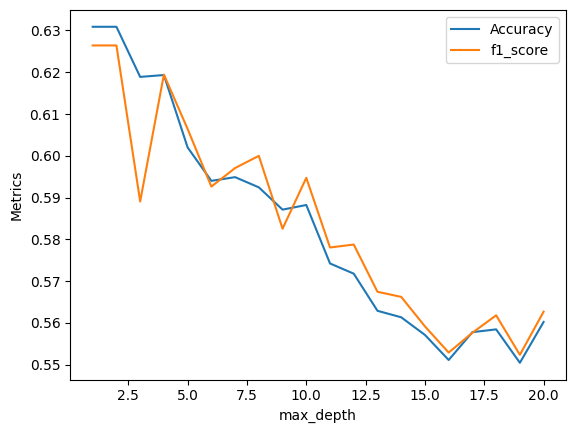

In [19]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []
f1_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=123)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())
    f1_scores.append(cross_val_score(clf,X_train,y_train,cv=10,scoring='f1').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores, label='Accuracy')
plt.plot(max_depth_range, f1_scores, label='f1_score')
plt.xlabel('max_depth')
plt.ylabel('Metrics')
plt.legend(loc='best')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
best_depth = sorted(zip(accuracy_scores, max_depth_range))[::-1][0][1]
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
clf.fit(X_train, y_train)

#Regresión logística
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [23]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
summary = pd.DataFrame(index=['Accuracy', 'f1_score'])
# Definición de los modelos base
modelos = {'tree_clf_1':  DecisionTreeClassifier(max_depth=5, random_state=1),
'tree_clf_2': DecisionTreeClassifier(min_samples_leaf=20, random_state=1),
'log_reg_clf': LogisticRegression(max_iter=10000)}

for modelo in modelos.keys():
    modelos[modelo].fit(X_train, y_train)
    y_pred = modelos[modelo].predict(X_test)
    summary[modelo] = {'Accuracy':accuracy_score(y_pred,y_test) , 'f1_score':f1_score(y_pred,y_test)}
    print(f'Modelo: {modelo}')
    print(f'Accuracy: {accuracy_score(y_pred,y_test)}')
    print(f'F1 Score: {f1_score(y_pred,y_test)}')
    ensemble_clf = BaggingClassifier(base_estimator=modelos[modelo], n_estimators=100, max_samples=300, oob_score=True, random_state=1, n_jobs=-1)
    ensemble_clf.fit(X_train, y_train)
    y_pred = ensemble_clf.predict(X_test)
    col_ensemble = str(modelo) + '_votacionM'
    summary[col_ensemble] = {'Accuracy':accuracy_score(y_pred,y_test) , 'f1_score':f1_score(y_pred,y_test)}
    print(f'Modelo para ensamble: {modelo}')
    print(f'Accuracy: {accuracy_score(y_pred,y_test)}')
    print(f'F1 Score: {f1_score(y_pred,y_test)}\n')


Modelo: tree_clf_1
Accuracy: 0.6373333333333333
F1 Score: 0.6616915422885573
Modelo para ensamble: tree_clf_1
Accuracy: 0.66
F1 Score: 0.6604527296937417

Modelo: tree_clf_2
Accuracy: 0.5713333333333334
F1 Score: 0.5525400139178844
Modelo para ensamble: tree_clf_2
Accuracy: 0.6673333333333333
F1 Score: 0.6657736101808439

Modelo: log_reg_clf
Accuracy: 0.6213333333333333
F1 Score: 0.6061026352288488
Modelo para ensamble: log_reg_clf
Accuracy: 0.624
F1 Score: 0.6147540983606558



**Primer árbol de decisión:**
Se configuró con una profundidad máxima de 5 niveles arrojando un accuracy de 0.637 y un f1_score de 0.661. Sin embargo, cuando se realizó el ensamblaje con bagging de 100 de estos árboles, el accuracy subió hasta 0.66 mientras que el f1_score bajó a 0.660.

**Segundo árbol de decisión:**
Se configuró para que tuviera mínimo 20 hojas o nodos terminales arrojando un accuracy de 0.5713 y un f1_score de 0.55. Cuando se realizó el ensamblaje, las métricas de este modelo subieron a 0.667 y 0.665 respectivamente.

**Regresión Logística:**
Se configuró para que hiciera un máximo de 10.000 iteraciones porque en algunas corridas no convergía a nada con el número máximo de iteraciones que tenía por defecto. Las métricas de la regresión logística fueron de 0.621 para el accuracy y 0.606 para el f1_score. Ambas métricas subieron en su respectivo ensamblaje a 0.624 y 0.614 respectivamente.

En conclusión, hasta el momento el mejor modelo ha sido el ensamblaje del segundo árbol de decisión y curiosamente fue el que tuvo una mejora más grande en el ensamblaje vs los demás modelos.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [21]:
# Celda 8
for modelo in modelos.keys():
    ensemble_clf = BaggingClassifier(base_estimator=modelos[modelo], n_estimators=100, max_samples=300, oob_score=True, random_state=1, n_jobs=-1)
    ensemble_clf.fit(X_train, y_train)
    y_pred = ensemble_clf.predict(X_test)
    errors = np.zeros(ensemble_clf.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], ensemble_clf.n_estimators))
    for i in range(ensemble_clf.n_estimators):
        oob_sample = ~ensemble_clf.estimators_samples_[i]
        y_pred_ = ensemble_clf.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = ensemble_clf.estimators_[i].predict(X_test)
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)
    col_ensemble = str(modelo) + '_votacionP'
    summary[col_ensemble] = {'Accuracy':accuracy_score(y_pred,y_test) , 'f1_score':f1_score(y_pred,y_test)}
    print(f'Modelo para ensamble: {modelo}')
    print(f'Accuracy: {accuracy_score(y_pred,y_test)}')
    print(f'F1 Score: {f1_score(y_pred,y_test)}\n')

Modelo para ensamble: tree_clf_1
Accuracy: 0.658
F1 Score: 0.6488706365503081

Modelo para ensamble: tree_clf_2
Accuracy: 0.6653333333333333
F1 Score: 0.6626344086021505

Modelo para ensamble: log_reg_clf
Accuracy: 0.6266666666666667
F1 Score: 0.6169630642954856



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [22]:
# Celda 9
summary

,tree_clf_1,tree_clf_1_votacionM,tree_clf_2,tree_clf_2_votacionM,log_reg_clf,log_reg_clf_votacionM,tree_clf_1_votacionP,tree_clf_2_votacionP,log_reg_clf_votacionP
Accuracy,0.637333,0.660000,0.571333,0.667333,0.621333,0.624000,0.658000,0.665333,0.626667
f1_score,0.661692,0.660453,0.552540,0.665774,0.606103,0.614754,0.648871,0.662634,0.616963


Las ventajas de la votación mayoritaria radican en que es más sencillo de implementar y computacionalmente menos costoso ya que solo requiere contar el número de votos para cada clase y elegir la clase con mayor cantidad de votos, además de esto, es menos sensible a errores de un modelo individual, ya que se basa en la mayoría de los votos y no en la precisión de cada modelo. Por otro lado, en cuanto a desventajas se encuentra que si hay modelos que tienden a equivocarse en una clase particular, podrían influir en la votación y afectar negativamente la precisión general del ensamblaje.

Por el lado de la votación ponderada se puede decir que corrige la última desventaja de la votación mayoritaria tratando de asignarle un mayor peso al modelo con menor error y de esta forma voliéndose más influyente en el resultado final, esto conduce a tener un modelo un poco mejor, o esto es lo que supone la teoría pero según los resultados de las corridas realizadas se puede ver cómo el modelo de votación ponderada solo mejora un poco para la regresión logística mientras que para los árboles de decisión obtuvo unas métricas menores.